In [19]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
images_path = (
    "/Users/lisa/Documents/Master/sam-lab/ACDC/database/preprocess/images.npy.gz"
)
ground_truth_path = (
    "/Users/lisa/Documents/Master/sam-lab/ACDC/database/preprocess/ground_truth.npy.gz"
)
with gzip.open(images_path, "rb") as f:
    # Load the NumPy array from the file
    images = np.load(f)

with gzip.open(ground_truth_path, "rb") as f:
    # Load the NumPy array from the file
    ground_truths = np.load(f)

In [7]:
ground_truths.shape

(2978, 256, 216)

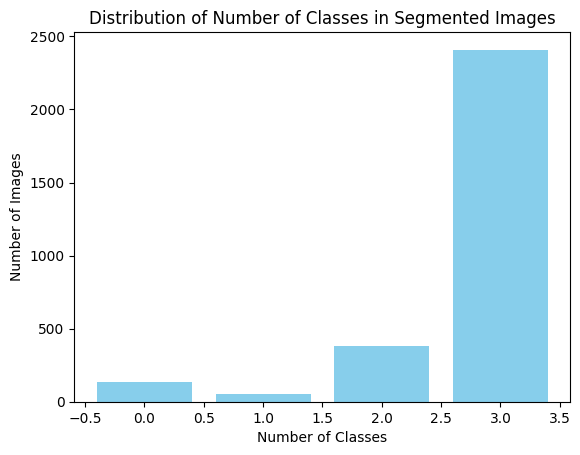

In [9]:
# Function to get the number of unique classes in an image
def count_classes(image):
    unique_classes = np.unique(image)
    unique_classes = unique_classes[unique_classes != 0]
    return len(unique_classes)


class_counts = [count_classes(image) for image in ground_truths]
df = pd.DataFrame(class_counts, columns=["Number of Classes"])
class_counts_summary = df["Number of Classes"].value_counts().sort_index()

# Plotting the bar chart
plt.bar(class_counts_summary.index, class_counts_summary.values, color="skyblue")
plt.xlabel("Number of Classes")
plt.ylabel("Number of Images")
plt.title("Distribution of Number of Classes in Segmented Images")
plt.show()

In [15]:
indices_three_classes = df[df["Number of Classes"] == 3].index.tolist()

In [20]:
def count_pixels(image, class_label):
    return np.sum(image == class_label)


class_labels = [1, 2, 3]
df_columns = ["Background"] + [f"Class_{label}" for label in class_labels]
df_pixels = pd.DataFrame(columns=df_columns)

# Populate the DataFrame with pixel counts for each class in each ground truth
for i in range(len(ground_truths)):
    row_data = {"Background": count_pixels(ground_truths[i], 0)}
    for label in class_labels:
        row_data[f"Class_{label}"] = count_pixels(ground_truths[i], label)
    df_pixels.loc[i] = row_data
# Display the resulting DataFrame
print(df_pixels.head())

   Background  Class_1  Class_2  Class_3
0       51447     1571      801     1477
1       51351     1431      942     1572
2       51572     1036      960     1728
3       52070      745      816     1665
4       52450      612      769     1465


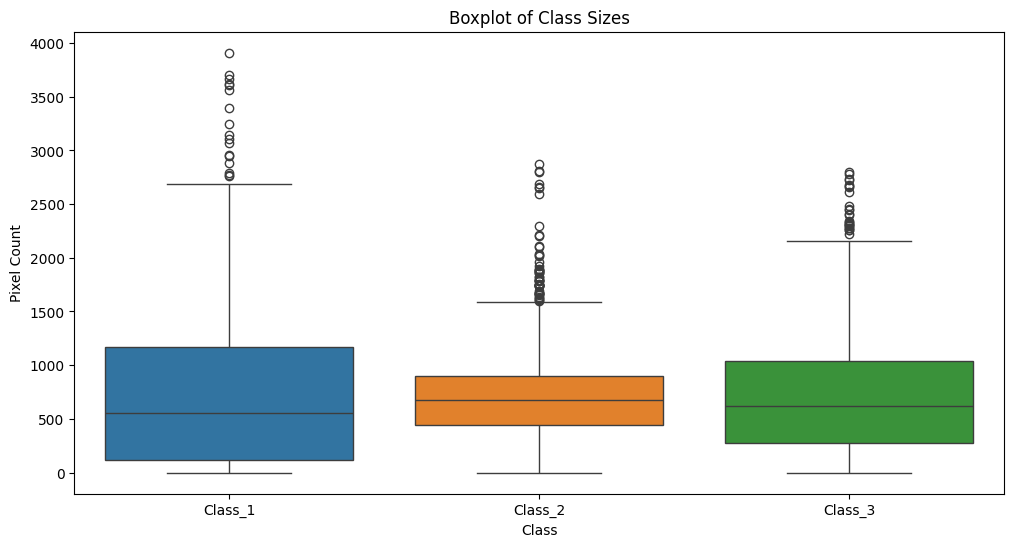

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop("Background", axis=1))
plt.title("Boxplot of Class Sizes")
plt.xlabel("Class")
plt.ylabel("Pixel Count")
plt.show()

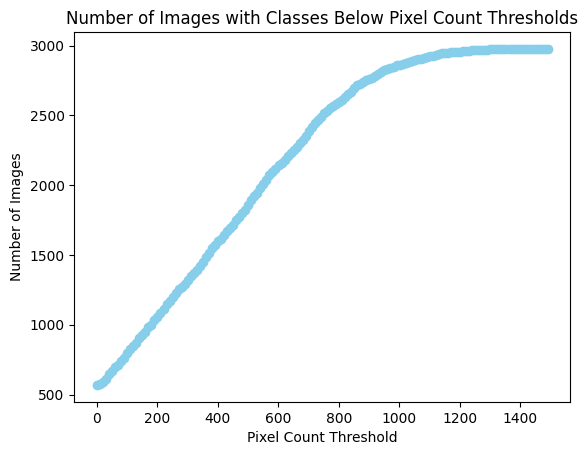

In [35]:
thresholds = range(1, 1500, 10)
count_per_threshold = []

# Calculate the cumulative count for each threshold
for threshold in thresholds:
    # Count the number of images with at least one class below the threshold
    count = df_pixels.drop("Background", axis=1).lt(threshold).any(axis=1).sum()
    count_per_threshold.append(count)

plt.plot(thresholds, count_per_threshold, color="skyblue", marker="o")
plt.title("Number of Images with Classes Below Pixel Count Thresholds")
plt.xlabel("Pixel Count Threshold")
plt.ylabel("Number of Images")
plt.show()

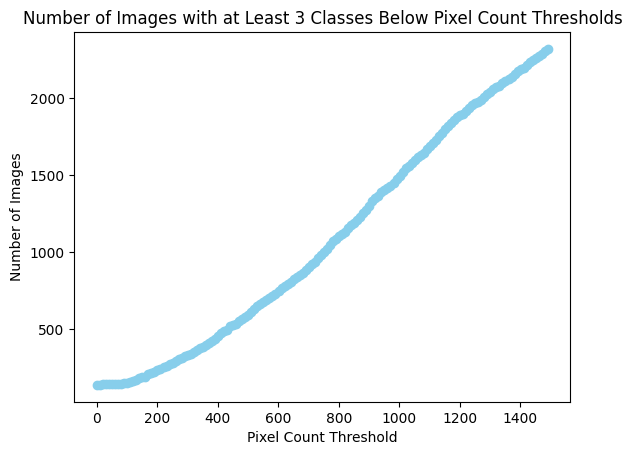

In [39]:
count_per_threshold = []

for threshold in thresholds:
    # Count the number of images with at least one class below the threshold and with at least 3 classes
    count = df_pixels.drop("Background", axis=1).lt(threshold).sum(axis=1).ge(3).sum()
    count_per_threshold.append(count)

# Plotting the line plot
plt.plot(thresholds, count_per_threshold, color="skyblue", marker="o")
plt.title("Number of Images with at Least 3 Classes Below Pixel Count Thresholds")
plt.xlabel("Pixel Count Threshold")
plt.ylabel("Number of Images")
plt.show()

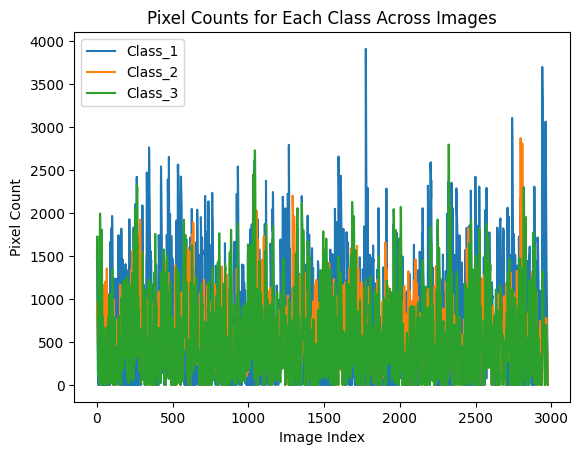

In [28]:
class_labels = ["Class_1", "Class_2", "Class_3"]
for label in class_labels:
    plt.plot(df_pixels[label], label=label)

plt.title("Pixel Counts for Each Class Across Images")
plt.xlabel("Image Index")
plt.ylabel("Pixel Count")
plt.legend()
plt.show()

In [32]:
filtered_df = df_pixels[df_pixels.drop("Background", axis=1).lt(50).any(axis=1)]
filtered_df.head()

,Background,Class_1,Class_2,Class_3
8,55010,0,182,104
16,54333,34,624,305
17,55148,0,148,0
26,53812,40,613,831
27,54523,0,290,483
